## Erdos-Renyi
We use the Erdos Renyi graph to look at the effect of $p$ on the critical temperature for phase transitions.

In [13]:
# imports
import sys
import os

sys.dont_write_bytecode = True

# For imports
sys.path.append(os.path.abspath(".."))

# Ising code
from ising_magnetic import ising
from ising_graph import IsingGraph
from ising_node import IsingNode

import numpy as np
import matplotlib.pyplot as plt

# Graph code
import networkx as nx
from nx_util import GraphUtil

100%|██████████| 20/20 [03:44<00:00, 11.24s/it]


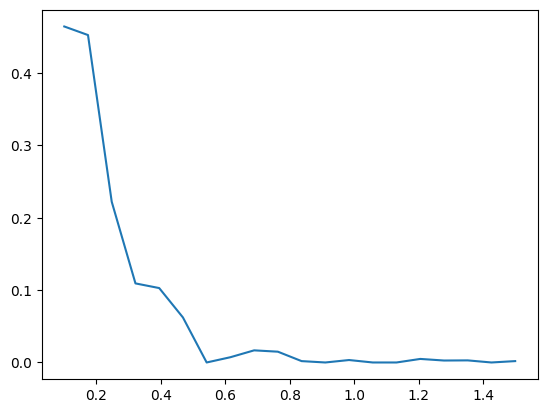

100%|██████████| 20/20 [04:13<00:00, 12.65s/it]


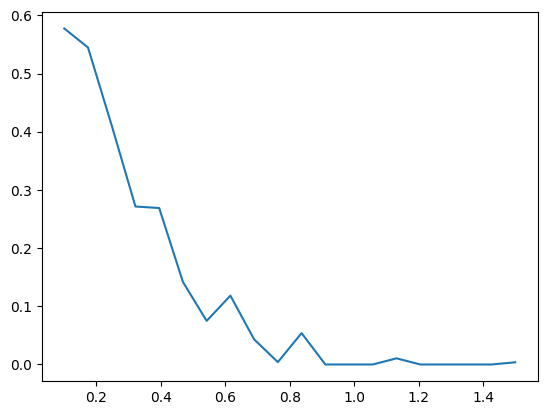

100%|██████████| 20/20 [03:59<00:00, 11.98s/it]


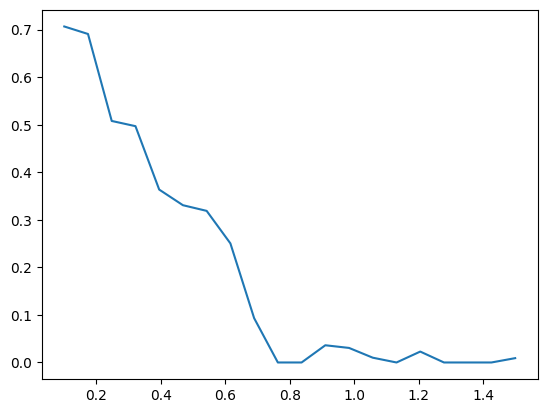

100%|██████████| 20/20 [03:43<00:00, 11.15s/it]


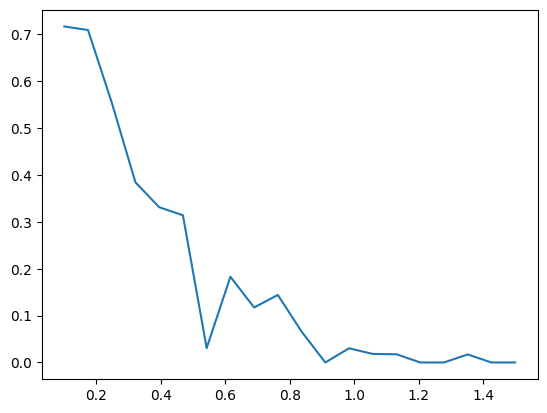

100%|██████████| 20/20 [08:06<00:00, 24.33s/it]


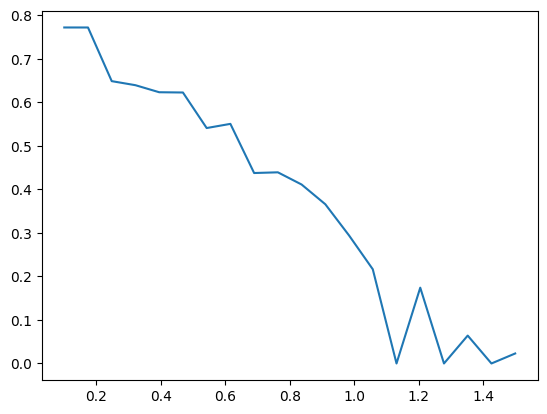

In [ ]:
from tqdm import tqdm
util = GraphUtil()
N = 500
T_list = np.linspace(0.1, 1.5, 20)
num_steps = 2000

double_jump = 1 / N
delta = double_jump / 5

p_list = np.arange(double_jump - 2 * delta, double_jump + 3 * delta, delta)
p_mag_map = {}

for p in p_list:
    G = nx.erdos_renyi_graph(N, p)
    M_values = []
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    p_mag_map[p] = M_values
    plt.plot(T_list, p_mag_map[p], label=f"p={p:.3f}")
    plt.show()

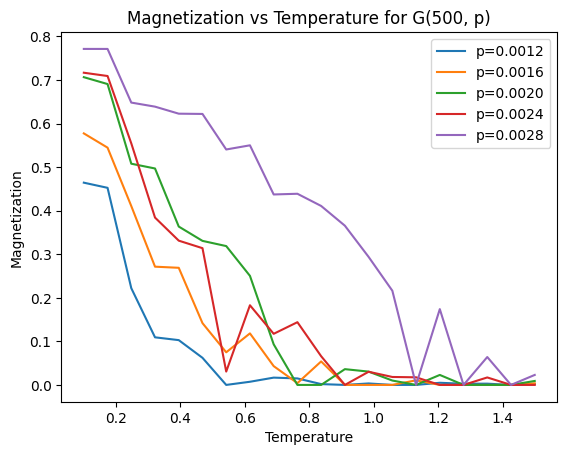

In [18]:
for p in p_list:
    plt.plot(T_list, p_mag_map[p], label=f"p={p:.4f}")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for G(500, p)")
plt.legend()
plt.show()

In [ ]:
# do it for larger p
gc_list = np.arange(double_jump, double_jump + 10 * delta, delta)

gc_mag_map = {}

for p in gc_list:
    G = nx.erdos_renyi_graph(N, p)
    M_values = []
    for T in tqdm(T_list[::2]):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    gc_mag_map[p] = M_values
    plt.show()

100%|██████████| 10/10 [01:50<00:00, 11.08s/it]


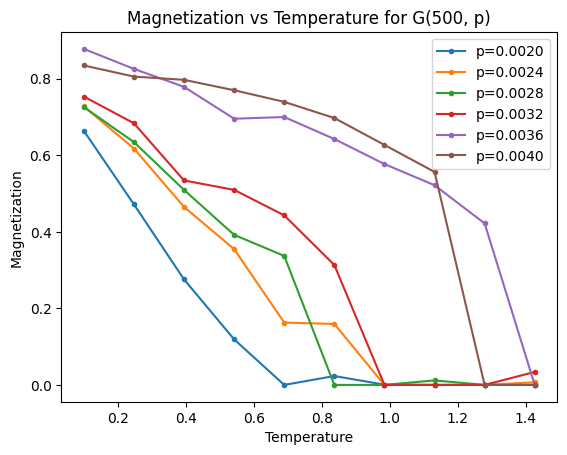

In [32]:
for p in gc_list[:6]:
    plt.plot(T_list[::2], gc_mag_map[p], label=f"p={p:.4f}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for G(500, p)")
plt.legend()
plt.show()

In [33]:
# do it for small p
sparse_list = np.arange(double_jump - 10 * delta, double_jump, delta)

sparse_mag_map = {}

for p in sparse_list:
    G = nx.erdos_renyi_graph(N, p)
    M_values = []
    for T in tqdm(T_list[::2]):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    sparse_mag_map[p] = M_values
    plt.show()

100%|██████████| 10/10 [01:45<00:00, 10.52s/it]


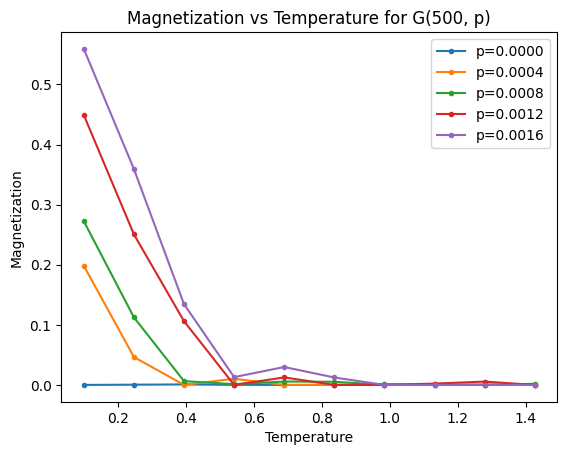

[-0.002  -0.0016 -0.0012 -0.0008 -0.0004  0.      0.0004  0.0008  0.0012
  0.0016]


In [37]:
for p in sparse_list[5:]:
    plt.plot(T_list[::2], sparse_mag_map[p], label=f"p={p:.4f}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for G(500, p)")
plt.legend()
plt.show()

print(sparse_list)

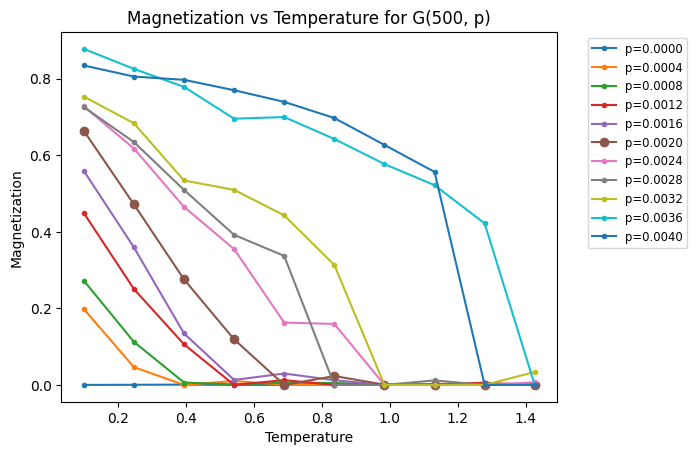

In [46]:
# combine
total_p = []
total_m = []
for p in sparse_list[5:]:
    plt.plot(T_list[::2], sparse_mag_map[p], label=f"p={p:.4f}", marker='.')
for p in gc_list[:6]:
    if p == double_jump:
        plt.plot(T_list[::2], gc_mag_map[p], label=f"p={p:.4f}", marker='o')
    else:
        plt.plot(T_list[::2], gc_mag_map[p], label=f"p={p:.4f}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
# make legend smaller
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title("Magnetization vs Temperature for G(500, p)")
# plt.legend()
plt.show()